### Import Library

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

### Read the Dataset

In [164]:
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Extract the Feature Matrix and Labels

In [165]:
X = df[['petal_length', 'sepal_length', 'sepal_width']].to_numpy()
y = df[['petal_width']].to_numpy().flatten()

In [166]:
#sns.scatterplot(x=X.flatten(), y=y)

### Train Test Split    

In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

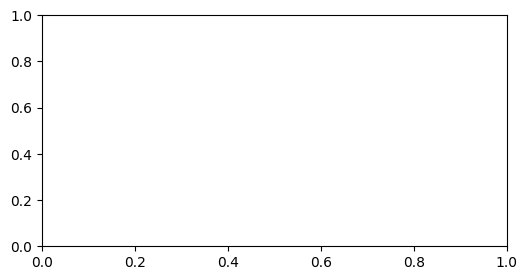

In [168]:
fig, ax = plt.subplots(1,1,figsize=(6,3))
#sns.scatterplot(ax=ax, x=X_train.flatten(), y=y_train, color='blue') #training data
#sns.scatterplot(ax=ax, x=X_test.flatten(), y=y_test, color='red') #testing data
#sns.lineplot(ax=ax, x=X_line, y=y_line, color='green')

### Model Training

In [169]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

In [170]:
model.coef_, model.intercept_

(array([ 0.52692601, -0.22664364,  0.22650184]),
 np.float64(-0.1540857749732123))

In [171]:
X_line = np.linspace(0, 8, 2) #returns evenly spaced numbers over an interval, in this case (0,8)
X_line

array([0., 8.])

In [172]:
y_line = X_line*model.coef_[0] + model.intercept_ #evenly spaced input * model coefb

In [173]:
# mean squared error -> mean distance of each datapoint to line
# mean absolute error -> MSE but absval
# root mean squared error -> MSE but sqrt
# r^2 is r^2

In [174]:
predictions = model.predict(X_test)

In [175]:
y_test

array([1.3, 1.3, 0.4, 1.9, 2.1, 0.2, 2.3, 1.8, 0.2, 1.2, 1.8, 1.5, 1.3,
       0.4, 2.4, 0.2, 1.8, 2.2, 1.4, 0.2, 1.5, 0.4, 0.3, 1.9, 1.5, 2.5,
       0.2, 2.3, 1.4, 2.2])

In [176]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test, predictions)) #(y_true, y_pred)

np.float64(0.200516816286579)

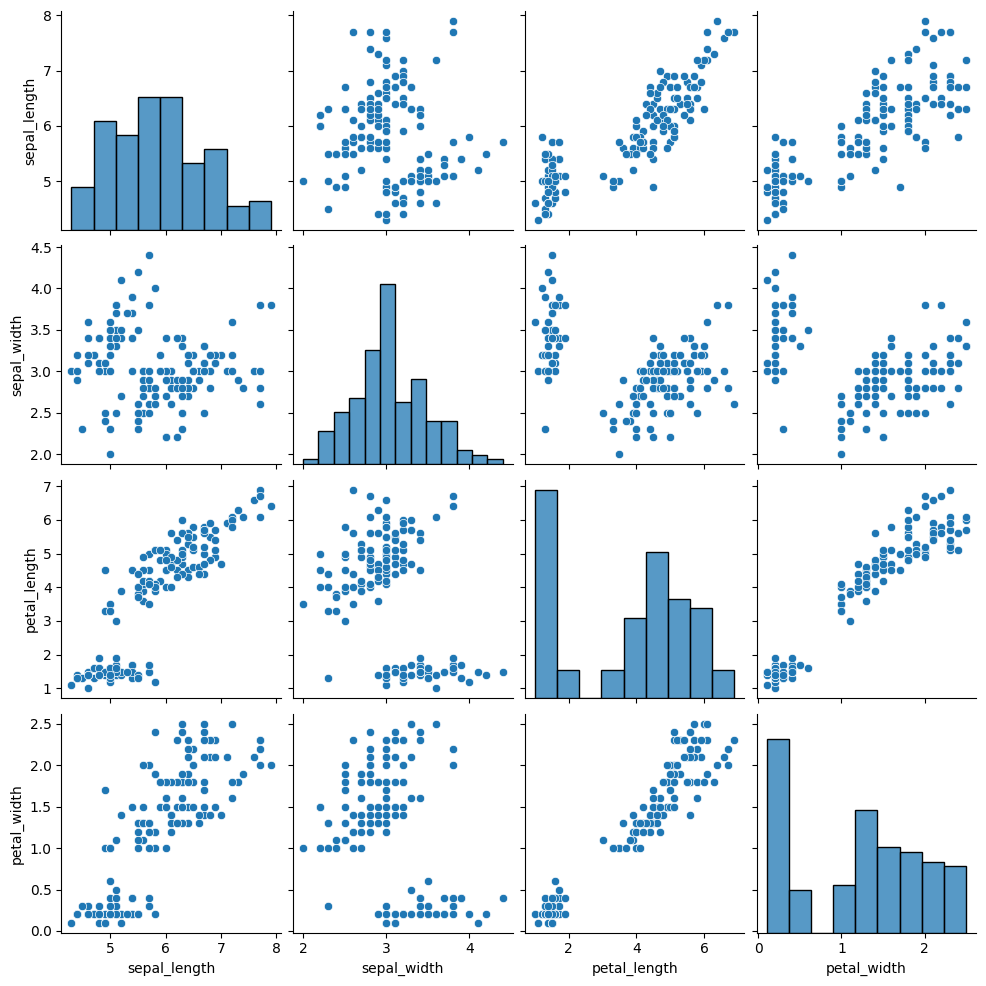

In [177]:
sns.pairplot(df)

### Logistic Regression

In [178]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].to_numpy()
y = df[['species']].to_numpy().flatten()

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [180]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [181]:
model.coef_, model.intercept_

(array([[-0.3949228 ,  0.90248925, -2.39465224, -1.0254413 ],
        [ 0.55016664, -0.32740031, -0.19481658, -0.78528626],
        [-0.15524384, -0.57508894,  2.58946882,  1.81072756]]),
 array([  9.31113865,   1.82618868, -11.13732732]))

In [182]:
prediction = model.predict(X_test)

In [183]:
y_test

array(['versicolor', 'versicolor', 'setosa', 'virginica', 'virginica',
       'setosa', 'virginica', 'virginica', 'setosa', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'virginica', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'setosa', 'virginica', 'versicolor', 'virginica'],
      dtype=object)

In [184]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.9666666666666667

### Decision Tree

In [185]:
X = df[df.columns[:-1]].to_numpy()
y = df[['species']].to_numpy().flatten()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [186]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [187]:
prediction = model.predict(X_test)

In [188]:
y_test

array(['versicolor', 'versicolor', 'setosa', 'virginica', 'virginica',
       'setosa', 'virginica', 'virginica', 'setosa', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'virginica', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'setosa', 'virginica', 'versicolor', 'virginica'],
      dtype=object)

In [189]:
accuracy_score(prediction, y_test)

0.9666666666666667

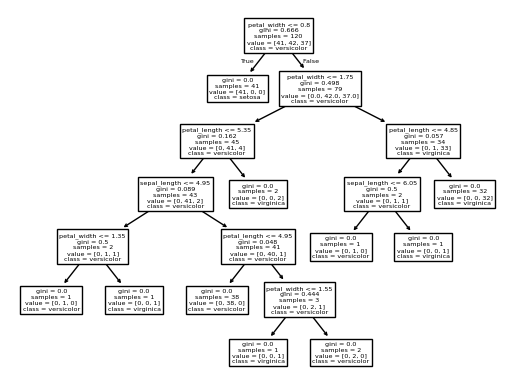

In [190]:
from sklearn.tree import plot_tree

plot_tree(model, feature_names=df.columns[:-1], class_names=model.classes_);

### K-Means Clustering

Clusters data, No predictions needed.
Groups together into similar groups

In [191]:
X = df[df.columns[:3:2]].to_numpy()
X

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

'Multi-Dimensional Indexing:\n\nWhen dealing with arrays that have more than one dimension (e.g., a 2D array or matrix), you use the comma to separate indexing or slicing along different dimensions.\nFor example, in a 2D array X:\nX[0, :] selects all columns of the first row.\nX[:, 2] selects all rows of the third column.\nX[1:3, 1:4] selects a subarray that starts from the second row to the third row (exclusive) and from the second column to the fourth column (exclusive).'

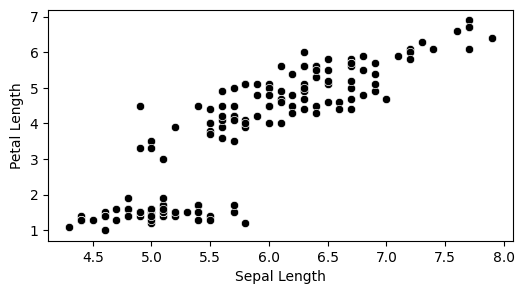

In [192]:
fig, ax = plt.subplots(1,figsize=(6,3))
sns.scatterplot(x=X[:,0].flatten(), y=X[:,1].flatten(), color='black', ax=ax)
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Petal Length')
'''Multi-Dimensional Indexing:

When dealing with arrays that have more than one dimension (e.g., a 2D array or matrix), you use the comma to separate indexing or slicing along different dimensions.
For example, in a 2D array X:
X[0, :] selects all columns of the first row.
X[:, 2] selects all rows of the third column.
X[1:3, 1:4] selects a subarray that starts from the second row to the third row (exclusive) and from the second column to the fourth column (exclusive).'''

In [193]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=13)
model.fit(X)

KMeans(n_clusters=3, random_state=13)

In [194]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

Text(0, 0.5, 'Petal Length')

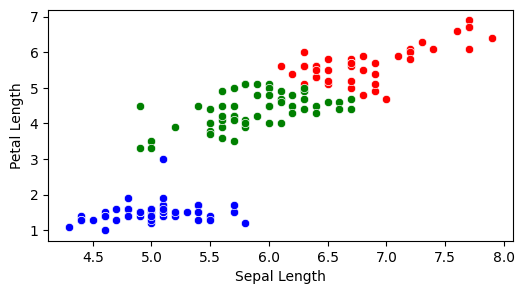

In [198]:
fig, ax = plt.subplots(1,figsize=(6,3))
sns.scatterplot(x=X[(model.labels_ == 0).nonzero(),0].flatten(), y=X[(model.labels_ == 0).nonzero(),1].flatten(), color='red', ax=ax)
sns.scatterplot(x=X[(model.labels_ == 1).nonzero(),0].flatten(), y=X[(model.labels_ == 1).nonzero(),1].flatten(), color='blue', ax=ax)
sns.scatterplot(x=X[(model.labels_ == 2).nonzero(),0].flatten(), y=X[(model.labels_ == 2).nonzero(),1].flatten(), color='green', ax=ax)
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Petal Length')